In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from sklearn.linear_model import LinearRegression

print 'done...'

done...


## Data Analysis for Propulsion Data Science Bootcamp

First of all let's read the data and merge both data sets using the `unique_id`

In [2]:
times = pd.read_csv('marathon_times.csv')
times.head()

,netTime,clockTime,unique_id
0,7661,7661,354658649da56c20c72b6689d2b7e1b8cc334ac9
1,7737,7737,1da607e762ac07eba6f9b5a717e9ff196d987242
2,7747,7747,1de4a95cef28c290ba5790217288f510afc3b26b
3,7750,7750,12215d93d2cb5b0234991a64d097955338a73dd3
4,8163,8163,5375986567be20b49067956e989884908fb807f6


In [3]:
attributes = pd.read_csv('runner_attributes.csv')
attributes.head()

,ageClass,sex,nationality,treatment,unique_id
0,20,M,KEN,Treatment,354658649da56c20c72b6689d2b7e1b8cc334ac9
1,20,M,KEN,Treatment,1da607e762ac07eba6f9b5a717e9ff196d987242
2,20,M,KEN,Control,1de4a95cef28c290ba5790217288f510afc3b26b
3,30,M,KEN,Control,12215d93d2cb5b0234991a64d097955338a73dd3
4,30,M,KEN,Treatment,5375986567be20b49067956e989884908fb807f6


In [4]:
runners = attributes.join(times, lsuffix="_attribute", rsuffix="_time")

runners.head()

,ageClass,sex,nationality,treatment,unique_id_attribute,netTime,clockTime,unique_id_time
0,20,M,KEN,Treatment,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661.0,7661.0,354658649da56c20c72b6689d2b7e1b8cc334ac9
1,20,M,KEN,Treatment,1da607e762ac07eba6f9b5a717e9ff196d987242,7737.0,7737.0,1da607e762ac07eba6f9b5a717e9ff196d987242
2,20,M,KEN,Control,1de4a95cef28c290ba5790217288f510afc3b26b,7747.0,7747.0,1de4a95cef28c290ba5790217288f510afc3b26b
3,30,M,KEN,Control,12215d93d2cb5b0234991a64d097955338a73dd3,7750.0,7750.0,12215d93d2cb5b0234991a64d097955338a73dd3
4,30,M,KEN,Treatment,5375986567be20b49067956e989884908fb807f6,8163.0,8163.0,5375986567be20b49067956e989884908fb807f6


Let's check the shape of the joined table

In [5]:
print(runners.shape)

(30923, 8)


Let's check that there are no attributes without time or times without attributes

In [6]:
notNullShape = runners[runners['unique_id_attribute'].notnull()].shape
notNullShape

(30923, 8)

In [7]:
notNullShape = runners[runners['unique_id_time'].notnull()].shape
notNullShape

(30373, 8)

As we can see, there has been a few runners that probably didn't finish the race.

At this point, let's remove them from our data

In [8]:
finishers = runners[runners['unique_id_time'].notnull()]
finishers = finishers.drop('unique_id_time', axis=1)
finishers = finishers.rename(columns = {'unique_id_attribute':'unique_id'})
finishers.head()

,ageClass,sex,nationality,treatment,unique_id,netTime,clockTime
0,20,M,KEN,Treatment,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661.0,7661.0
1,20,M,KEN,Treatment,1da607e762ac07eba6f9b5a717e9ff196d987242,7737.0,7737.0
2,20,M,KEN,Control,1de4a95cef28c290ba5790217288f510afc3b26b,7747.0,7747.0
3,30,M,KEN,Control,12215d93d2cb5b0234991a64d097955338a73dd3,7750.0,7750.0
4,30,M,KEN,Treatment,5375986567be20b49067956e989884908fb807f6,8163.0,8163.0


In [9]:
finishers = finishers.drop('clockTime', axis=1)
finishers.head()

,ageClass,sex,nationality,treatment,unique_id,netTime
0,20,M,KEN,Treatment,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661.0
1,20,M,KEN,Treatment,1da607e762ac07eba6f9b5a717e9ff196d987242,7737.0
2,20,M,KEN,Control,1de4a95cef28c290ba5790217288f510afc3b26b,7747.0
3,30,M,KEN,Control,12215d93d2cb5b0234991a64d097955338a73dd3,7750.0
4,30,M,KEN,Treatment,5375986567be20b49067956e989884908fb807f6,8163.0


### Visual Preliminary Analysis

In order to understand whether using the shoes makes a difference we could try to calculate the correlation.

However, before moving to linear regression. Let's plot some attributes with the `netTime` to try to understand whether there exists some correlation among them

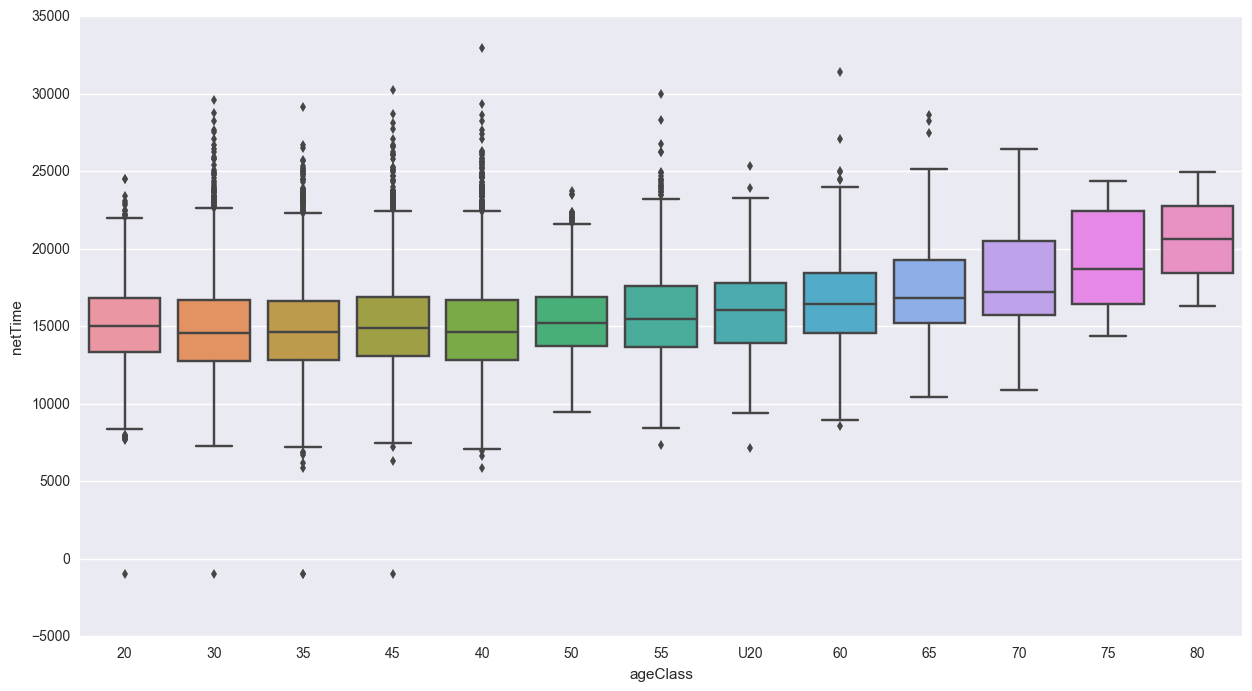

In [10]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='ageClass', y='netTime', data=finishers)
plt.show()

As we can see, it seems to be a relationship between AGE and time.

If the AGE is above 60, the average time and most of the runners take longer to finish the marathon.

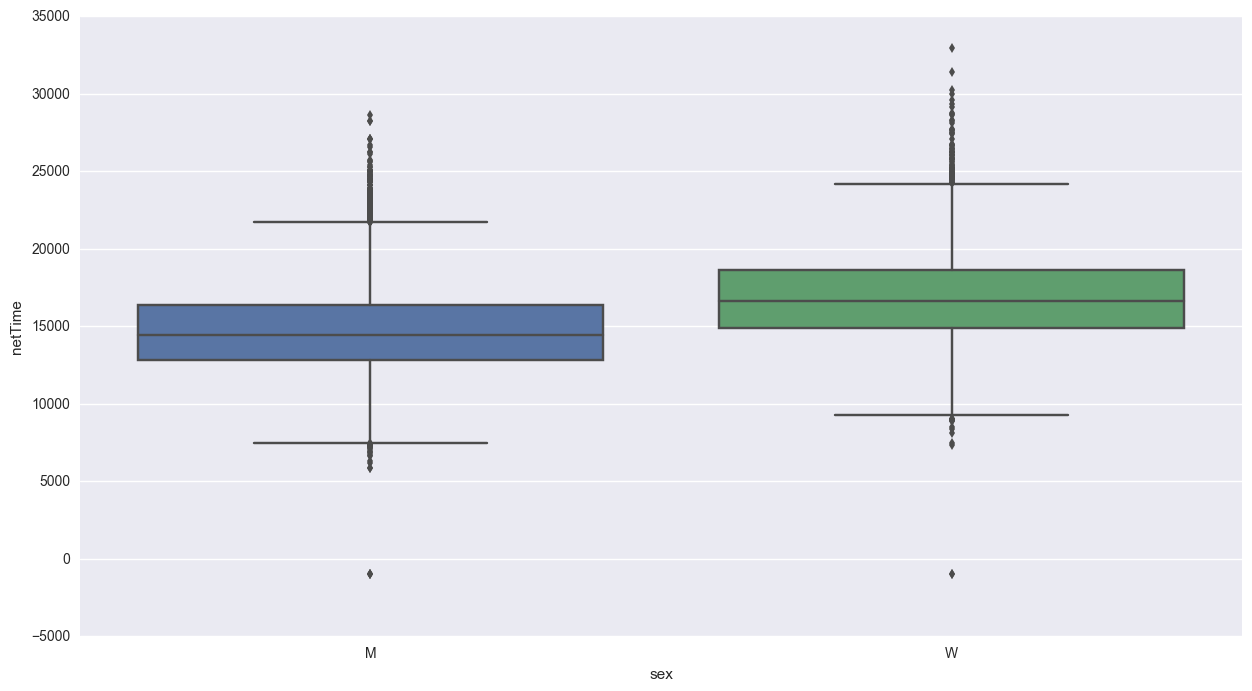

In [11]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='sex', y='netTime', data=finishers)
plt.show()

Sex of the runner seems to have also correlation with the time to finish the marathon.

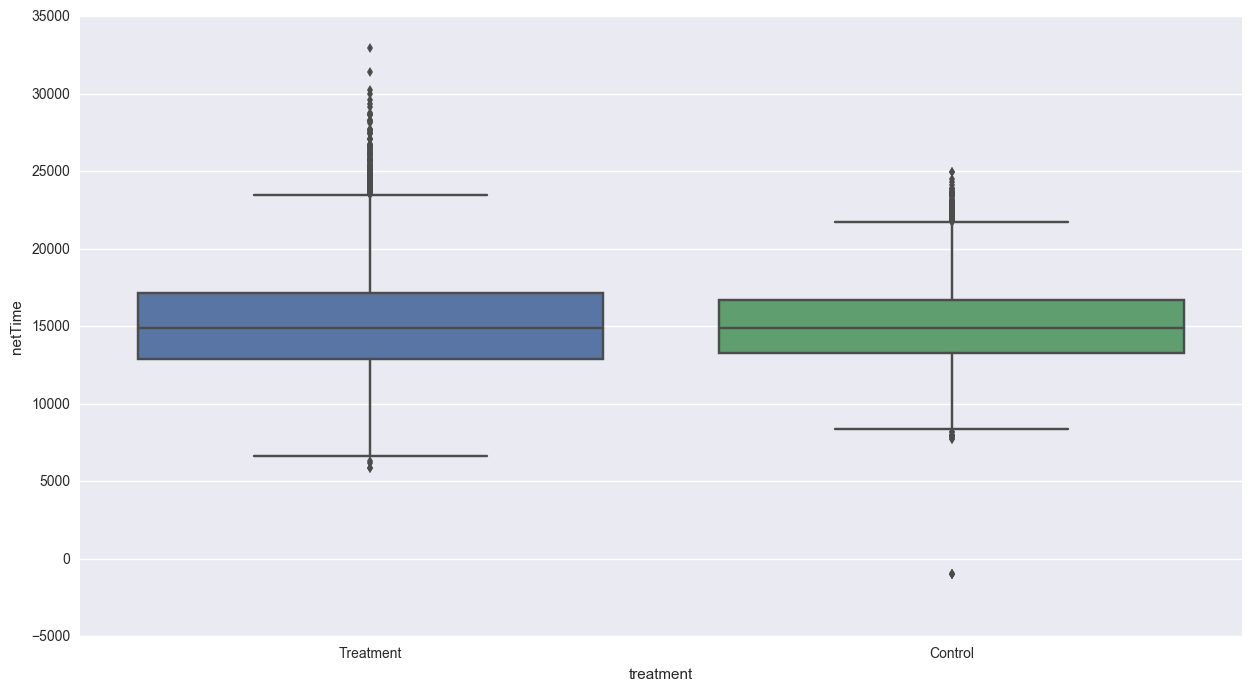

In [12]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='treatment', y='netTime', data=finishers)
plt.show()

With this plot we can't conclude whether it exists some kind or correlation or not.

Averages are the same in Control and Treatment group. What seems to be different is the correlation.

### Clean Dataset

In the plots we can see som outliers that seem to show a bad input.

There are negative `netTime`s.

Let's remove that.

In [13]:
finishers = finishers[finishers['netTime'] > 0];

### Categorical Features

It's much easier to work with numerical values than with categories.

Let's transform our caterory features into numerical values.

In [14]:
finishers['treatment_num'] = finishers['treatment'].apply(lambda x: 0 if x == 'Control' else 1)
cat_finishers = finishers.drop('treatment', axis=1)
finishers = finishers.drop('treatment_num', axis=1)
cat_finishers.head()

,ageClass,sex,nationality,unique_id,netTime,treatment_num
0,20,M,KEN,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661.0,1
1,20,M,KEN,1da607e762ac07eba6f9b5a717e9ff196d987242,7737.0,1
2,20,M,KEN,1de4a95cef28c290ba5790217288f510afc3b26b,7747.0,0
3,30,M,KEN,12215d93d2cb5b0234991a64d097955338a73dd3,7750.0,0
4,30,M,KEN,5375986567be20b49067956e989884908fb807f6,8163.0,1


In [15]:
cat_finishers['sex_num'] =  cat_finishers['sex'].apply(lambda x: 0 if x == 'M' else 1)
cat_finishers = cat_finishers.drop('sex', axis=1)
cat_finishers.head()

,ageClass,nationality,unique_id,netTime,treatment_num,sex_num
0,20,KEN,354658649da56c20c72b6689d2b7e1b8cc334ac9,7661.0,1,0
1,20,KEN,1da607e762ac07eba6f9b5a717e9ff196d987242,7737.0,1,0
2,20,KEN,1de4a95cef28c290ba5790217288f510afc3b26b,7747.0,0,0
3,30,KEN,12215d93d2cb5b0234991a64d097955338a73dd3,7750.0,0,0
4,30,KEN,5375986567be20b49067956e989884908fb807f6,8163.0,1,0


In [16]:
nations = pd.get_dummies(finishers['nationality'])
nations.head()

,AFG,AGO,AHO,ALB,ARG,AUS,AUT,BEL,BGR,BIH,...,SVK,SVN,SWE,THA,TUR,TWN,USA,VEN,YUG,ZAF
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ages = pd.get_dummies(finishers['ageClass'])
ages.head()

,20,30,35,40,45,50,55,60,65,70,75,80,U20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
cat_finishers = cat_finishers.drop('ageClass', axis=1)
cat_finishers = cat_finishers.drop('nationality', axis=1)
cat_finishers = cat_finishers.drop('unique_id', axis=1)
cat_finishers = cat_finishers.join(nations)
cat_finishers = cat_finishers.join(ages)
print(cat_finishers.shape)
cat_finishers.head()

(30368, 108)


,netTime,treatment_num,sex_num,AFG,AGO,AHO,ALB,ARG,AUS,AUT,...,40,45,50,55,60,65,70,75,80,U20
0,7661.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7737.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7747.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7750.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8163.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Two Datasets

First of all, in order to understand whether using the Shoes makes a difference or not. We will separate our dataset in two.

On one side the runners that used the shoes, and in the other the ones that didn't.

Then we will use PCA and linear regression to try to predict the runner finishing time.

In [19]:
finishers_with = cat_finishers[cat_finishers['treatment_num'] == 1]
finishers_with = finishers_with.drop('treatment_num', axis=1)
print(finishers_with.shape)

(15202, 107)


In [20]:
finishers_without = cat_finishers[cat_finishers['treatment_num'] == 0]
finishers_without = finishers_without.drop('treatment_num', axis=1)
print(finishers_without.shape)

(15166, 107)


### Separate X and Y

For each dataset, let's differentiate the predicted value and the inputs.

We are going to use `netTime` as prediction.

In [21]:
finishers_with_Y = finishers_with['netTime'];
print(finishers_with_Y.shape)

finishers_with_X = finishers_with.drop('netTime', axis=1)
print(finishers_with_X.shape)

finishers_without_Y = finishers_without['netTime'];
print(finishers_without_Y.shape)

finishers_without_X = finishers_without.drop('netTime', axis=1)
print(finishers_without_X.shape)

(15202,)
(15202, 106)
(15166,)
(15166, 106)


### Linear Regression

Let's try running the linear regression

In [22]:
lm_with = LinearRegression()
lm_with.fit(finishers_with_X, finishers_with_Y)

# print intercept
print lm_with.intercept_

print lm_with.score(finishers_with_X, finishers_with_Y)

1.83983525315e+15
0.162979294481


In [23]:
lm_without = LinearRegression()
lm_without.fit(finishers_without_X, finishers_without_Y)

# print intercept and coefficients
print lm_without.intercept_

print lm_without.score(finishers_with_X, finishers_with_Y)

-1.61626000939e+16
-2.49137278563e+21


As we can see the R-Square is very low on both data sets.

Using this input the Linear Regression does not work.

This makes sense, since we started with all Categorical Values. Not linear values.

### Age Group

Let's try to group the finishers per age and see whether there was any difference in their average time.

In [24]:
grouped_by_age = finishers.groupby(['ageClass', 'treatment'])

def compute_average(data):
    result = {
        'average_time': data['netTime'].mean(),
        'count': data['netTime'].count()
    }
    return pd.Series(result)

grouped_by_age = grouped_by_age.apply(compute_average)
grouped_by_age = grouped_by_age.reset_index()
grouped_by_age

,ageClass,treatment,average_time,count
0,20,Control,15047.298724,1724.0
1,20,Treatment,15183.022767,1713.0
2,30,Control,14811.069444,1944.0
3,30,Treatment,14967.121212,1914.0
4,35,Control,14816.830114,2796.0
5,35,Treatment,14815.885616,2920.0
6,40,Control,14833.067041,3386.0
7,40,Treatment,14977.609589,3358.0
8,45,Control,14995.994255,2437.0
9,45,Treatment,15252.463648,2407.0


We can see that there is one age group where no one got shoes

Let's remove it from our grouped table

In [25]:
grouped_by_age = grouped_by_age[grouped_by_age['ageClass'] != '80']
print(grouped_by_age.shape)

(24, 4)


In [26]:
grouped_by_age_diff = grouped_by_age.groupby('ageClass')

def compute_diff(data):
    result = {
        'diff_time': data[data['treatment'] == 'Control']['average_time'].values[0] - data[data['treatment'] == 'Treatment']['average_time'].values[0],
        'total_count': data['count'].sum()
    }
    return pd.Series(result)

grouped_by_age_diff = grouped_by_age_diff.apply(compute_diff)
grouped_by_age_diff

,diff_time,total_count
ageClass,,
20,-135.724043,3437.0
30,-156.051768,3858.0
35,0.944498,5716.0
40,-144.542548,6744.0
45,-256.469392,4844.0
50,-98.280615,3066.0
55,-53.234360,1407.0
60,-90.616281,735.0
65,-163.759205,351.0


As we can see, all the age groups, except Under 20 have a better average time in the Control group.

This might mean that in average, the shoes do not help to run faster.

### Sex Group

Let's try to group the finishers per sex and see whether there was any difference in their average time.

In [27]:
grouped_by_sex = finishers.groupby(['sex', 'treatment'])

grouped_by_sex = grouped_by_sex.apply(compute_average)
grouped_by_sex = grouped_by_sex.reset_index()
grouped_by_sex

,sex,treatment,average_time,count
0,M,Control,14761.287839,12236.0
1,M,Treatment,14621.222476,12262.0
2,W,Control,16278.356314,2930.0
3,W,Treatment,17488.956463,2940.0


In [28]:
grouped_by_sex_diff = grouped_by_sex.groupby('sex')
grouped_by_sex_diff = grouped_by_sex_diff.apply(compute_diff)
grouped_by_sex_diff

,diff_time,total_count
sex,,
M,140.065363,24498.0
W,-1210.600149,5870.0


In this grouping we can see how there is a significance difference between Male and Female in their averages using or not using the shoes.

In the Males, the average was 2 minutes faster. Which indicates a better performance in the males with the shoes.

In the females, the average was 20 minutes slower. Which is a little bit unbelieavable.

This either indicates an error in the data or the worst shoes ever invented for the females.

Or just a very bad representation of the females in both groups. The Control and Treatment groups.

### Group by Sex and Age

Now let's make the same analysis differentiation sex and age at the same time.

In [42]:
grouped_by_sex_age = finishers.groupby(['sex', 'ageClass', 'treatment'])

grouped_by_sex_age = grouped_by_sex_age.apply(compute_average)
grouped_by_sex_age = grouped_by_sex_age.reset_index()

grouped_by_sex_age = grouped_by_sex_age[grouped_by_sex_age['ageClass'] != '80']

grouped_by_sex_age_diff = grouped_by_sex_age.groupby(['sex', 'ageClass'])
grouped_by_sex_age_diff = grouped_by_sex_age_diff.apply(compute_diff)

grouped_by_sex_age_diff

diff_time  total_count
sex ageClass                          
M   20        -154.445398       2559.0
    30         209.335331       3018.0
    35         312.994594       4594.0
    40         197.272283       5405.0
    45          68.740932       3963.0
    50        -102.169222       2579.0
    55         232.247004       1236.0
    60         163.338569        645.0
    65         126.113924        316.0
    70        -745.925000         49.0
    75        -363.500000         10.0
    U20       1011.490909        122.0
W   20        -127.652507        878.0
    30       -1465.639999        840.0
    35       -1261.202658       1122.0
    40       -1595.799861       1339.0
    45       -1614.838174        881.0
    50        -168.751502        487.0
    55       -2132.768620        171.0
    60       -1123.266968         90.0
    65       -2294.457237         35.0
    70       -4442.000000          2.0
    U20       -910.230159         25.0

When we analyzed the Age Class by itself, we saw that the average time was worse for all of them.

However, when analyzing the Age Class with the Sex. We learned that there are Age Classes where the Male benefit from it.

It was the female average time that was pushing down the average of the whole Age Class

# Conclusion

Linear Regression is not helpful.

The shoes seem to make the females much slower.

The Males in general seem to perform better with the shoes.